In [1]:
#LOAD DATA
import scipy.io as sio
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler2 = MinMaxScaler(feature_range=(-1, 1))

num_sample = 200
samp_freq = 5000
num_chan = 96
X = np.zeros((num_sample, samp_freq, num_chan))
Y = np.zeros(num_sample)
for i in range(1,num_sample//3 + 1):
    file = sio.loadmat('data/patient_1/non-ictal-train/patient_1_%d.mat' % i)
#     file = sio.loadmat('data\patient_1\non-ictal train\patient_1_%d.mat' %i)
    data = file['data']
    data = scaler.fit_transform(data)
    data = scaler2.fit_transform(data)
    X[i-1,:,:] = data
    Y[i-1] = 0
j = 1
for i in range(num_sample//3+1,num_sample +1):
    file = sio.loadmat('data/patient_1/ictal train/patient_1_%d.mat' % j)
    data = file['data']
    data = scaler.fit_transform(data)
    data = scaler2.fit_transform(data)
    X[i-1,:,:] = data
    Y[i-1] = 1
    j = j+1

#SHUFFLE DATA
indices = np.arange(Y.shape[0])
np.random.shuffle(indices)
Y = Y[indices]
X = X[indices, :, :]
X = X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
print("data shape",X.shape)
# print(Y)

#Test data
num_test = 15
samp_freq = 5000
num_chan = 96
testX = np.zeros((num_test, samp_freq, num_chan))
testY = np.zeros(num_test)
for i in range(1,num_test//2 + 1 ):
    r = random.randint(200,218)
    file = sio.loadmat('data/patient_1/non-ictal-train/patient_1_%d.mat' % r)
    data = file['data']
    data = scaler.transform(data)
    data = scaler2.transform(data)
    testX[i-1,:,:] = data
    testY[i-1] = 0
j = 1
for i in range(num_test//2+1,num_test +1):
    r = random.randint(200,218)
    file = sio.loadmat('data/patient_1/ictal train/patient_1_%d.mat' % r)
    data = file['data']
    data = scaler.transform(data)
    data = scaler2.transform(data)
    testX[i-1,:,:] = data
    testY[i-1] = 1
    j = j+1
    
indices = np.arange(testY.shape[0])
np.random.shuffle(indices)
testY = testY[indices]
testX = testX[indices, :, :]
testX = testX.reshape(testX.shape[0],testX.shape[1],testX.shape[2],1)
# valX = testX[0:7,:,:,:]
# valY = testY[0:7]
# testX = testX[7:15,:,:,:]
# testY = testY[7:15]
# print('valX',valX.shape)
print('testX',testX.shape)
print(testY)


C:\Users\eesha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


data shape (200, 5000, 96, 1)
testX (15, 5000, 96, 1)
[1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.]


Train on 190 samples, validate on 10 samples
Epoch 1/5
190/190 [==============================] - 587s 3s/step - loss: 0.3928 - acc: 0.6263 - val_loss: 0.1000 - val_acc: 0.9000
Epoch 2/5
190/190 [==============================] - 591s 3s/step - loss: 0.3421 - acc: 0.6579 - val_loss: 0.1000 - val_acc: 0.9000
Epoch 3/5
190/190 [==============================] - 572s 3s/step - loss: 0.3421 - acc: 0.6579 - val_loss: 0.1000 - val_acc: 0.9000
Epoch 4/5
190/190 [==============================] - 578s 3s/step - loss: 0.3421 - acc: 0.6579 - val_loss: 0.1000 - val_acc: 0.9000


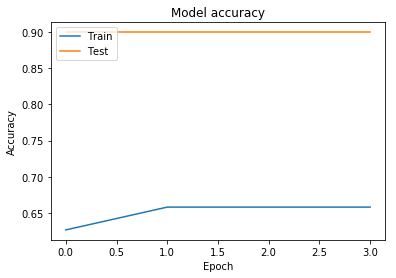

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


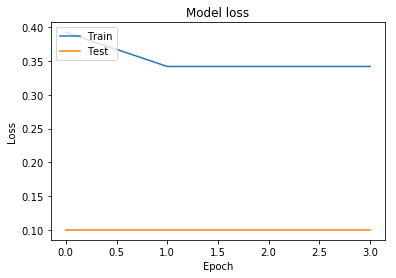

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=7, activation= 'relu', input_shape=(5000,96,1))) #0
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(5, 5)))
#OUTPUT 1: LAYER 5 output
model.add(Dropout(0.5))
#OUTPUT 2: LAYER 6 output
model.add(Flatten())
#OUTPUT 3: LAYER 7 output
model.add(Dense(1, activation='sigmoid')) #BINARY CLASSIFICATION
#OUTPUT 4: LAYER 8 output
model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.04,patience=3, restore_best_weights=True)]
history = model.fit(X, Y, callbacks= callbacks, validation_split=0.05, epochs=5) #squared_hinge #categorical_hinge #batch_size=64,

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [ ]:
print('Real labels', testY)
print('CNN prediction',model.predict(testX))
print('CNN prediction: floor', model.predict(testX) >= 1)
print('CNN prediction: threshold', model.predict(testX) >= 0.7)

from keras import backend as K
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

scaler = StandardScaler()
scaler2 = MinMaxScaler(feature_range=(-1, 1))
scaler3 =  MinMaxScaler(feature_range=(0, 1))

get_5th_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[5].output])
# output in test mode = 0
layer_output = get_5th_layer_output([testX, 0])[0]
print(layer_output.shape)

# output in train mode = 1
layer_output = get_5th_layer_output([X, 1])[0]
print(layer_output.shape)

for i in range(5,9):
    get_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[i].output])
    layer_output = get_5th_layer_output([x, 0])[0]
    layeroutput1 = scaler.fit_transform(layer_output)
    layeroutput2 = scaler2.fit_transform(layer_output)
    layeroutput3 = scaler3.fit_transform(layer_output)
    
    #SVM CLASSIFCIATION
    clf = svm.SVC() #gamma='auto'
    clf.fit(layeroutput1, Y) 
    print()
    
    #LOG REGRESSION
    #RANDOM FOREST

Real labels [1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
CNN prediction [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
CNN prediction: floor [[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]
CNN prediction: threshold [[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]
(15, 248, 2, 64)


In [3]:
##ANALYSIS: As of now, true = floor(predictions) =>100% accuracy
'''PREPROCESSING'''
#1) validation split size = 0.15 3) batch size 4) include more points from non ictal !!!balanced data vs non balanced
'''MODEL STRUCTURE'''
#1) increase dropout layer, kernel size, pooling layers
#2) Try adding SVM, log regression, random forest, Kalman filter (seperately first, then with CNN)

'''MODEL TRAINING'''
#2) Bootstrapping & boosting

'MODEL TRAINING'

In [4]:
import numpy as np
a = np.array([0,1,2,3,4])
b = np.array([5,6,7,8,9])

indices = np.arange(a.shape[0])
np.random.shuffle(indices)

a = a[indices]
b = b[indices]
# a, array([3, 4, 1, 2, 0])
# b, array([8, 9, 6, 7, 5])